In [30]:
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [31]:
from sklearn import svm

In [32]:
file = open("hand.txt","r")
data = file.read()
file.close()


In [33]:

def getIndexMax(data):
    dataSplitted = data.split("\n")
    return len(dataSplitted)


In [34]:

def returnDataToUse(data,index,answers=False,training=False,last=False):
    dataSplitted = data.split("\n")
    if index > len(dataSplitted):
        print("Indice fuera",len(dataSplitted))
        return 0

    if answers and not training:
        firstLine = dataSplitted[0][:-1].split(" ")
        firstAnsw = firstLine[256:]
        firstAnsw2 = [int(i) for i in firstAnsw]
        
        firstAnswInt = firstAnsw2.index(1)
        correctAnswers = [firstAnswInt]      

        i = 1
        while i < index:
            temp = dataSplitted[i][:-1].split(" ")
            temp2 = temp[256:]
            temp3 = [int(k) for k in temp2]
            temp4 = temp3.index(1)
            correctAnswers.append(temp4)
            i += 1

        completeAnswers = np.array(correctAnswers)

        if last:
            return completeAnswers[-1]
        else:
            return completeAnswers

    if training and not answers:
        firstLine = dataSplitted[0][:-1].split(" ")
        firstTraining = firstLine[:256]
        trainingArray = np.array([float(i) for i in firstTraining])

        i = 1
        while i < index:
            temp = dataSplitted[i][:-1].split(" ")
            temp2 = temp[:256]
            temp3 = np.array([float(k) for k in temp2])
            trainingArray = np.vstack((trainingArray,temp3))
            i += 1

        if last:
            return trainingArray[-1]
        else:
            return trainingArray

In [35]:

def displayImage(data,row):
    dataSplitted = data.split("\n")
    strings = dataSplitted[row]
    stringsSplitted = (strings[:-1]).split(" ")  
    risp = stringsSplitted[256:]
    rispInt = [int(i) for i in risp]
    rispNp = np.array(rispInt)
    print(rispInt)
    print("Numero a suponer:",rispInt.index(1),"\n")
    training = stringsSplitted[:256]
    trainingFloat = [float(i) for i in training]
    i = 16
    k = 0
    img = np.array(trainingFloat[:16])
    while i <= len(trainingFloat):
        temp = np.array(trainingFloat[k:i])
        img = np.vstack((img,temp)) 
        k = i   
        i += 16

    # Plot image
    plt.imshow(img,cmap=plt.cm.gray_r,interpolation="nearest")
    plt.show()

In [36]:
# Numero de ejemplos entrenados
trainingSamples = 1500

# Gamma:  Parametro del gradiente de descenso
clf = svm.SVC(gamma=0.01, C=100)

# Indice máximo
print("Indice máximo:",getIndexMax(data),"\n")

answerArray = returnDataToUse(data,trainingSamples,answers=True)
trainingAr = returnDataToUse(data,trainingSamples,training=True)

x,y = trainingAr,answerArray

#Fit datos
clf.fit(x,y)


Indice máximo: 1594 



SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Prediction: [2]
Actual answer 2 

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
Numero a suponer: 2 



/usr/local/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


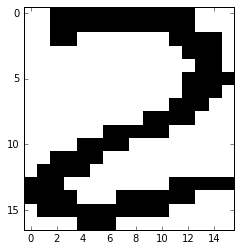

In [38]:
# Escoger un ejemplo para test
example = 1300

predictQ = returnDataToUse(data,example,training=True,last=True)
predictA = returnDataToUse(data,example,answers=True,last=True)

print("Prediction:",clf.predict(predictQ))
print("Actual answer",predictA,"\n")

# Mostrar el ejemplo actual
displayImage(data,example)

In [39]:
# Test en los datos
correct = 0
wrong = 0
j = example+1
while j < getIndexMax(data):
    q = returnDataToUse(data,j,training=True,last=True)
    a = returnDataToUse(data,j,answers=True,last=True)
    p = clf.predict(q)
    if a == p[0]:
        correct += 1
    else:
        wrong += 1
    j += 1

print("Statistics, correct answers:",correct/(correct+wrong))

/usr/local/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/usr/local/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  

Statistics, correct answers: 0.9726962457337884


/usr/local/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
